<h1> <center> &#127756 Parcial I Física Computacional &#127826 </center> </h1>

<h3> <center> <em> Sebastián Marín, Gabriela E. Díaz, J. Sebastián Useche </em> </center> </h3>
<h4> <center> <em> Programa de Física, Facultad de Ciencias Básicas y Tecnologías </em> </center></h4>
<br><br>
<center> Trabajo realizado en: </center> 
 
![logo jupyter](jup_logo.png)

In [2]:
# Librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from sklearn.linear_model import LinearRegression

In [28]:
# Abriendo archivo csv
datos = pd.read_csv("METABRIC_RNA_Mutation.csv")
datos.columns[:31]

C:\Users\s\AppData\Local\Temp\ipykernel_2252\565455140.py:2: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  datos = pd.read_csv("METABRIC_RNA_Mutation.csv")


Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       'er_status', 'neoplasm_histologic_grade',
       'her2_status_measured_by_snp6', 'her2_status',
       'tumor_other_histologic_subtype', 'hormone_therapy',
       'inferred_menopausal_state', 'integrative_cluster',
       'primary_tumor_laterality', 'lymph_nodes_examined_positive',
       'mutation_count', 'nottingham_prognostic_index', 'oncotree_code',
       'overall_survival_months', 'overall_survival', 'pr_status',
       'radio_therapy', '3-gene_classifier_subtype', 'tumor_size',
       'tumor_stage', 'death_from_cancer'],
      dtype='object')

In [30]:
datos["mutation_count"].describe()

count    1859.000000
mean        5.697687
std         4.058778
min         1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        80.000000
Name: mutation_count, dtype: float64

<h2> Primer paso: selección y explicación de variables </h2>
<hr>
<p>Inicialmente, se seleccionan las variables que se utilizarán y se analiza cada columna individualmente para determinar si tiene un significado coherente en el modelo que se vaya a realizar. Así, la contribución de cada columna es la siguiente:</p>
<ul>
    <li> <b> cancer_type_detailed:</b> Contiene la información específica del tipo de cáncer detectado.</li>
    <li> <b> lymph_nodes_examined_positive:</b> Describe cuantos ganglios linfáticos han detectado células cancerosas. </li>
    <li> <b> overall_survival:</b> si el paciente esta vivo o muerto. </li>
    <li> <b> tumor_size: </b> tamaño del tumor en mm. </li>
    <li> <b> chemotherapy: </b> Si el paciente fue tratado o no con quimioterapia. </li>
</ul>

In [4]:
# Tabla de las variables seleccionadas
analisis = pd.DataFrame(datos, columns = ["overall_survival", "chemotherapy","cancer_type_detailed",
                                      "lymph_nodes_examined_positive", "tumor_size"])
analisis

,overall_survival,chemotherapy,cancer_type_detailed,lymph_nodes_examined_positive,tumor_size
0,1,0,Breast Invasive Ductal Carcinoma,10.0,22.0
1,1,0,Breast Invasive Ductal Carcinoma,0.0,10.0
2,0,1,Breast Invasive Ductal Carcinoma,1.0,15.0
3,1,1,Breast Mixed Ductal and Lobular Carcinoma,3.0,25.0
4,0,1,Breast Mixed Ductal and Lobular Carcinoma,8.0,40.0
...,...,...,...,...,...
1899,1,0,Breast Invasive Lobular Carcinoma,1.0,25.0
1900,0,0,Breast Invasive Ductal Carcinoma,1.0,20.0
1901,0,0,Breast Invasive Ductal Carcinoma,45.0,25.0
1902,0,0,Breast Invasive Ductal Carcinoma,12.0,25.0


In [5]:
analisis.info()
analisis.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   overall_survival               1904 non-null   int64  
 1   chemotherapy                   1904 non-null   int64  
 2   cancer_type_detailed           1889 non-null   object 
 3   lymph_nodes_examined_positive  1904 non-null   float64
 4   tumor_size                     1884 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 74.5+ KB


overall_survival                  0
chemotherapy                      0
cancer_type_detailed             15
lymph_nodes_examined_positive     0
tumor_size                       20
dtype: int64

<h2> Segundo paso </h2>
<hr>
<p> Ahora, se deben eliminar aquellos datos que no aporten a la base de datos, es decir, los valores nulos; ya que pueden generar errores en los diferentes parámetros estadísticos que se calculen como la mediana, el promedio, la media, entre otros.</p>
<p> El propósito de la siguiente celda es eliminar aquellas filas cuyos valores <b>NO</b> nulos ocupen al menos un 80% de los datos, ya que consideramos que si faltan al menos dos datos de cada paciente, puede dificultar el diagnóstico del mismo. El resultado fue que se eliminaron 6 filas. Posteriormente, se rectificó que no hubiesen identificaciones duplicadas en la base de datos, ya que es el único dato irrepetible.</p>

In [6]:
# Porcentaje de valores no nulos para la limpieza
porcentaje = 0.8

# Eliminación de valores nulos con cierto umbral
limpieza_1 = analisis.dropna(thresh = porcentaje*len(analisis.columns))
limpieza_1 = limpieza_1.dropna(thresh = porcentaje*len(analisis), axis = 1)
limpieza_1

,overall_survival,chemotherapy,cancer_type_detailed,lymph_nodes_examined_positive,tumor_size
0,1,0,Breast Invasive Ductal Carcinoma,10.0,22.0
1,1,0,Breast Invasive Ductal Carcinoma,0.0,10.0
2,0,1,Breast Invasive Ductal Carcinoma,1.0,15.0
3,1,1,Breast Mixed Ductal and Lobular Carcinoma,3.0,25.0
4,0,1,Breast Mixed Ductal and Lobular Carcinoma,8.0,40.0
...,...,...,...,...,...
1899,1,0,Breast Invasive Lobular Carcinoma,1.0,25.0
1900,0,0,Breast Invasive Ductal Carcinoma,1.0,20.0
1901,0,0,Breast Invasive Ductal Carcinoma,45.0,25.0
1902,0,0,Breast Invasive Ductal Carcinoma,12.0,25.0


In [7]:
def var_str(Dataframe, columna):
    Valores_unicos = Dataframe[columna].unique()
    for i in range(len(Valores_unicos)):
        print(Valores_unicos[i], "=", i)

In [8]:
# Planteamiento de ecuación
# ===============================================================================================
from sklearn import preprocessing

# Creación de vector de variable dependiente
var_dep = "overall_survival"
y = limpieza_1.loc[:, var_dep]

# Variables categóricas
var_str(limpieza_1, "cancer_type_detailed")
analisis1 = limpieza_1.drop(["cancer_type_detailed"], axis = 1)
encoder = preprocessing.LabelEncoder()
analisis1["cancer_type_detailed"] = encoder.fit_transform(limpieza_1.cancer_type_detailed.values)
analisis1.cancer_type_detailed.replace({5: np.nan}, inplace = True)

analisis1

Breast Invasive Ductal Carcinoma = 0
Breast Mixed Ductal and Lobular Carcinoma = 1
Breast Invasive Lobular Carcinoma = 2
Breast Invasive Mixed Mucinous Carcinoma = 3
Breast = 4
nan = 5
Metaplastic Breast Cancer = 6


,overall_survival,chemotherapy,lymph_nodes_examined_positive,tumor_size,cancer_type_detailed
0,1,0,10.0,22.0,1.0
1,1,0,0.0,10.0,1.0
2,0,1,1.0,15.0,1.0
3,1,1,3.0,25.0,4.0
4,0,1,8.0,40.0,4.0
...,...,...,...,...,...
1899,1,0,1.0,25.0,2.0
1900,0,0,1.0,20.0,1.0
1901,0,0,45.0,25.0,1.0
1902,0,0,12.0,25.0,1.0


In [34]:
analisis1.describe()

,overall_survival,chemotherapy,lymph_nodes_examined_positive,tumor_size,cancer_type_detailed
count,1903.000000,1903.000000,1903.000000,1884.000000,1902.000000
mean,0.420389,0.208092,2.003153,26.238726,1.452156
std,0.493751,0.406050,4.080807,15.160976,1.043793
min,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,17.000000,1.000000
50%,0.000000,0.000000,0.000000,23.000000,1.000000
75%,1.000000,0.000000,2.000000,30.000000,1.000000
max,1.000000,1.000000,45.000000,182.000000,6.000000


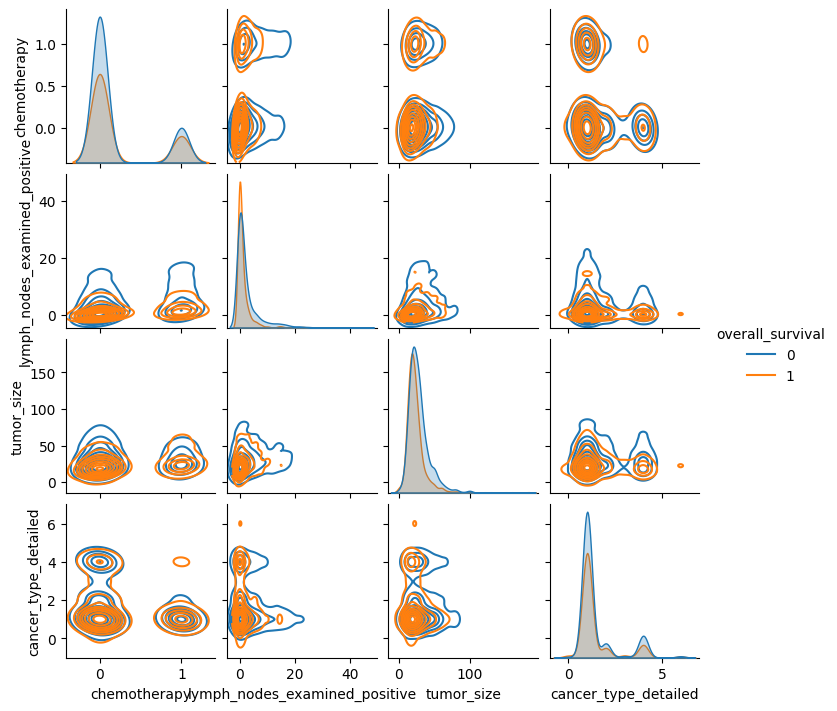

In [26]:
sns.pairplot(analisis1, hue = "overall_survival", kind = "kde", height = 1.8)
plt.show()

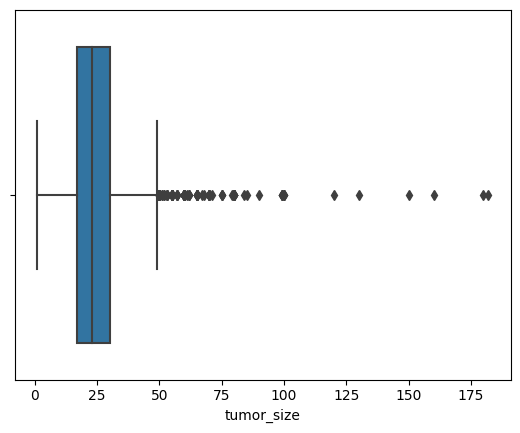

In [33]:
sns.boxplot(x = analisis1["tumor_size"])
plt.show()

In [9]:
test_data=analisis1[analisis1["tumor_size"].isnull()]#separando datos nulos para la variable de prueba
test_data


,overall_survival,chemotherapy,lymph_nodes_examined_positive,tumor_size,cancer_type_detailed
152,0,1,9.0,NaN,1.0
170,1,0,0.0,NaN,1.0
799,0,0,1.0,NaN,1.0
980,1,0,0.0,NaN,1.0
1047,0,1,1.0,NaN,1.0
1195,0,0,1.0,NaN,1.0
1260,0,0,0.0,NaN,1.0
1385,0,0,0.0,NaN,4.0
1481,0,0,4.0,NaN,1.0
1513,1,0,0.0,NaN,2.0


In [10]:
#elimine los valores nulos del marco de datos y represéntelos como "datos de entrenamiento"
analisis1.dropna(inplace=True)
analisis1

,overall_survival,chemotherapy,lymph_nodes_examined_positive,tumor_size,cancer_type_detailed
0,1,0,10.0,22.0,1.0
1,1,0,0.0,10.0,1.0
2,0,1,1.0,15.0,1.0
3,1,1,3.0,25.0,4.0
4,0,1,8.0,40.0,4.0
...,...,...,...,...,...
1899,1,0,1.0,25.0,2.0
1900,0,0,1.0,20.0,1.0
1901,0,0,45.0,25.0,1.0
1902,0,0,12.0,25.0,1.0


In [12]:
x_train = analisis1.drop("tumor_size", axis=1)
x_train

,overall_survival,chemotherapy,lymph_nodes_examined_positive,cancer_type_detailed
0,1,0,10.0,1.0
1,1,0,0.0,1.0
2,0,1,1.0,1.0
3,1,1,3.0,4.0
4,0,1,8.0,4.0
...,...,...,...,...
1899,1,0,1.0,2.0
1900,0,0,1.0,1.0
1901,0,0,45.0,1.0
1902,0,0,12.0,1.0


In [14]:
y_train = analisis1["tumor_size"]
y_train

0       22.0
1       10.0
2       15.0
3       25.0
4       40.0
        ... 
1899    25.0
1900    20.0
1901    25.0
1902    25.0
1903    20.0
Name: tumor_size, Length: 1883, dtype: float64

In [15]:
lr=LinearRegression()

In [16]:
lr.fit(x_train,y_train)

LinearRegression()

In [17]:
#datos de prueba con las columnas que se va a predecir el tamaño del tumor q hay datos NAN 
x_test=test_data[["overall_survival","chemotherapy", "lymph_nodes_examined_positive" ]]
x_test

,overall_survival,chemotherapy,lymph_nodes_examined_positive
152,0,1,9.0
170,1,0,0.0
799,0,0,1.0
980,1,0,0.0
1047,0,1,1.0
1195,0,0,1.0
1260,0,0,0.0
1385,0,0,0.0
1481,0,0,4.0
1513,1,0,0.0


In [18]:
#aplique el modelo en x_test de datos de prueba para hacer predicciones, variable 'y_pred'
y_pred=lr.predict(x_test)
y_pred

C:\Users\s\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- cancer_type_detailed

  warnings.warn(message, FutureWarning)


ValueError: X has 3 features, but LinearRegression is expecting 4 features as input.

In [55]:
# Finalmente, reemplazamos los valores faltantes con valores predichos
test_data["y_pred"]=y_pred
test_data

C:\Users\Acer\AppData\Local\Temp\ipykernel_18052\4289781952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["y_pred"]=y_pred


,overall_survival,chemotherapy,lymph_nodes_examined_positive,tumor_size,y_pred
152,0,1,9.0,NaN,37.541769
170,1,0,0.0,NaN,21.155286
357,1,0,0.0,NaN,21.155286
799,0,0,1.0,NaN,26.151057
980,1,0,0.0,NaN,21.155286
1047,0,1,1.0,NaN,31.593364
1195,0,0,1.0,NaN,26.151057
1260,0,0,0.0,NaN,25.407507
1385,0,0,0.0,NaN,25.407507
1481,0,0,4.0,NaN,28.381709


SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (2874516834.py, line 2)

In [57]:
# Tratamiento valores nulos
# ======================================================================

# Calculando media de columnas con valores nulos
def reemplazo_nulos(base_datos):
    for i in base_datos:
        if base_datos[i].any() == True:
            prediccion = base_datos[i].y_pred
            base_datos[i].fillna(y_pred, inplace = True)
    return base_datos

analisis1 = reemplazo_nulos(test_data)
analisis1.isnull().sum()

AttributeError: 'Series' object has no attribute 'y_pred'

<AxesSubplot:>

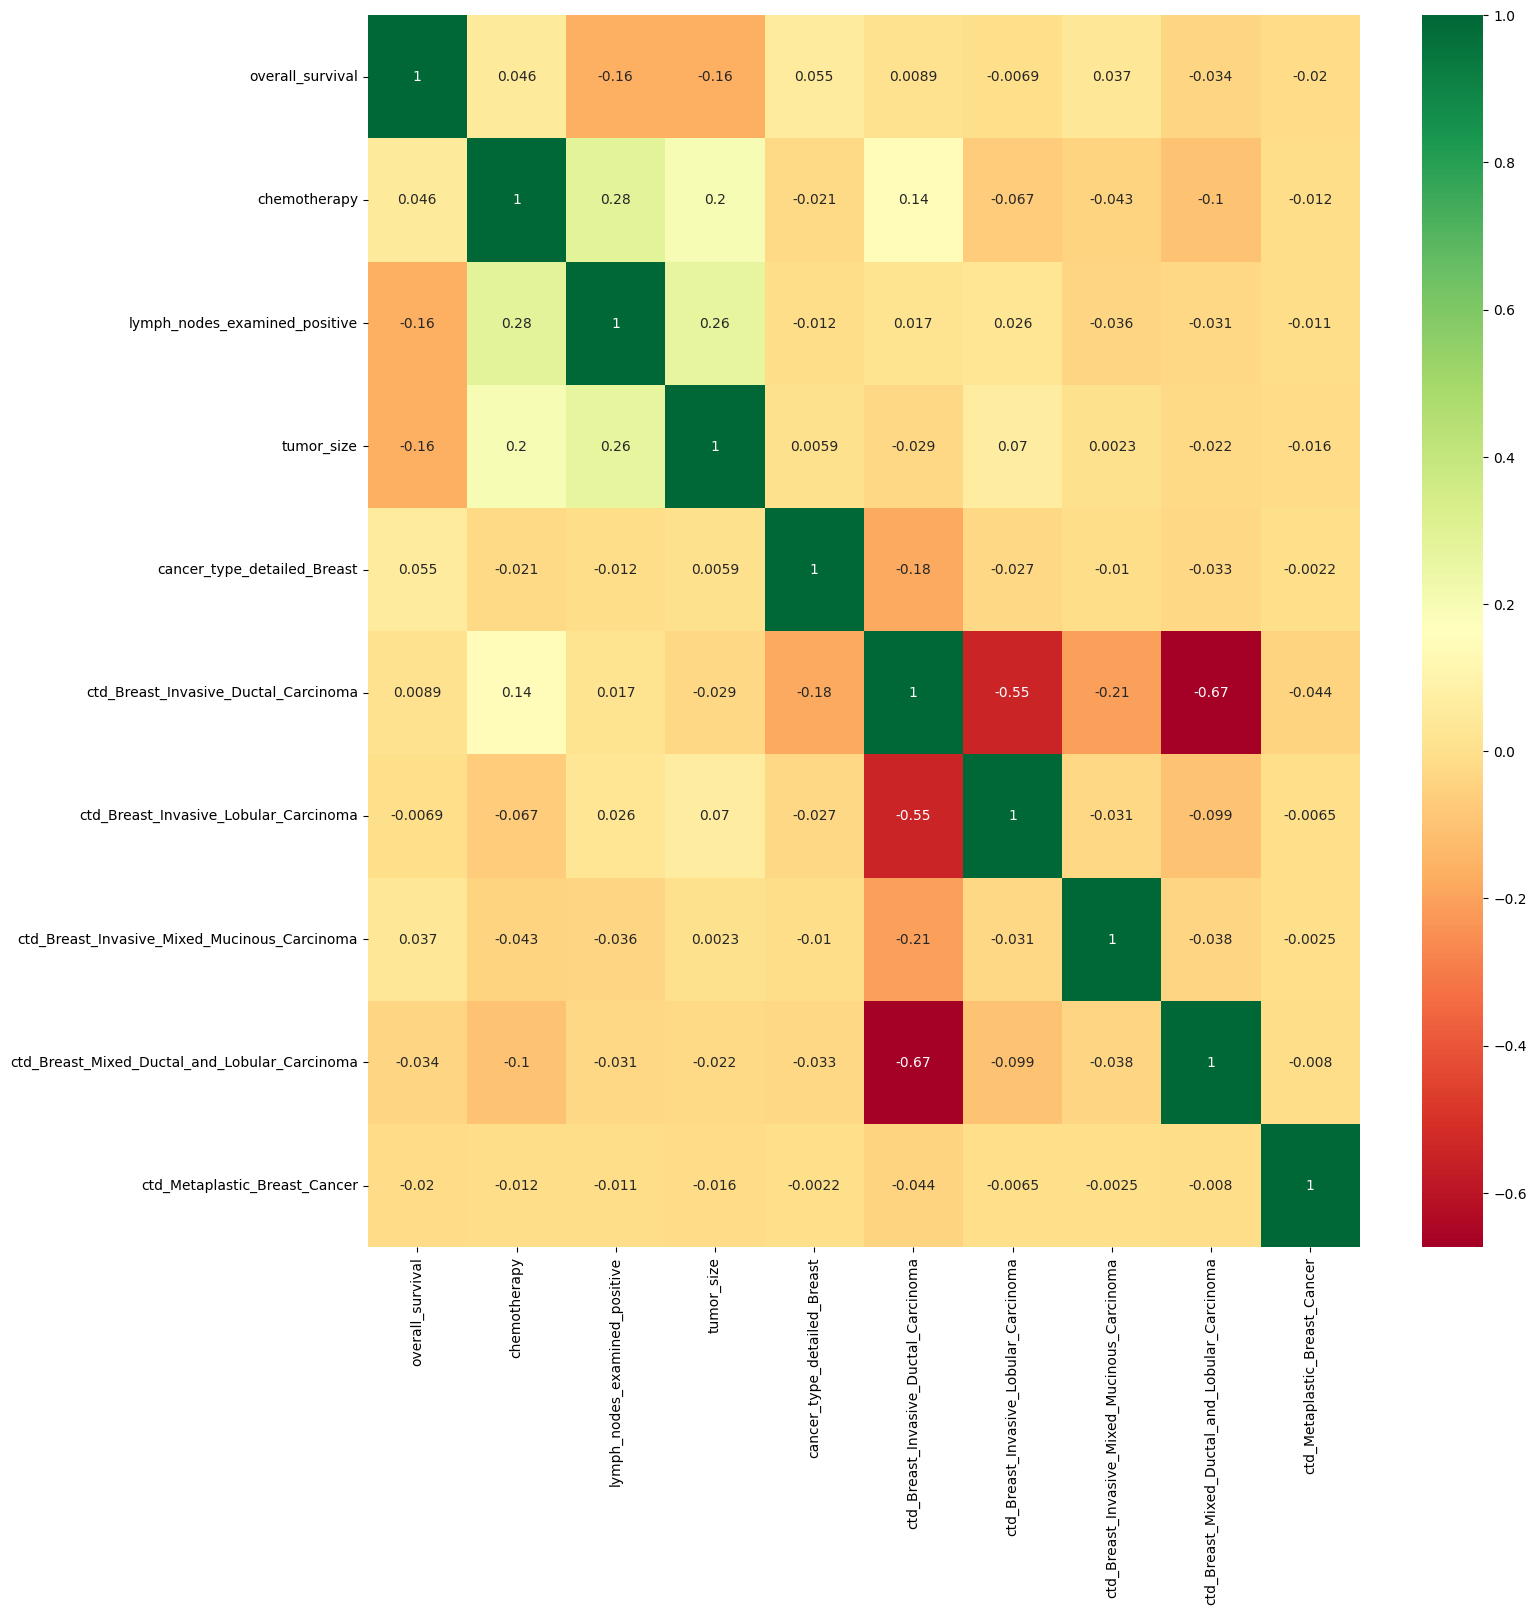

In [6]:
#comparando independencia entre variables
plt.figure(figsize = (16,16))
sns.heatmap(analisis1.corr(), annot = True, cmap = "RdYlGn")

<h1> Pruebas de normalidad </h1>
<hr>
<h2> D'Agostino </h2>

<p> A continuación, se realiza una prueba (llamada prueba D'Agostino), para determinar si los datos siguen o no una distribución normal, ya que la prueba de Shapiro es poco precisa para la cantidad de datos que tenemos en esta base de datos. </p>

<p> Así, la prueba de hipótesis que plantea D'Agostino es la siguiente:</p>

<p> $H_0:$ Los datos proceden de una distribución normal.</p>

<p> $H_1:$ Los datos no proceden de una distribución normal.</p>

<p> Si se rechaza $H_0$, se concluye que hay evidencia estadística suficiente para afirmar que los datos no siguen una distribución normal. Por lo tanto, las siguientes celdas se centrarán en realizar esta prueba y, en caso de no seguir una distribución normal, hacer una estandarización de los datos. </p>

In [13]:
for i in analisis1:
    k2, p_value = stats.normaltest(analisis1[i])
    print(f"{i} = {k2}, p_valor = {p_value}")

patient_id = 1031.4157023980508, p_valor = 1.0738063060534453e-224
overall_survival = 7332.254123491217, p_valor = 0.0
neoplasm_histologic_grade = 156.114306118142, p_valor = 1.2595318480138823e-34
lymph_nodes_examined_positive = 1573.4760743914558, p_valor = 0.0
nottingham_prognostic_index = 14.08499100849108, p_valor = 0.0008739429104918542
tumor_size = 1437.4947960022523, p_valor = 0.0
hormone_therapy = 8165.562753177722, p_valor = 0.0
cancer_type_detailed_Breast = 3040.361146308996, p_valor = 0.0
ctd_Breast_Invasive_Ductal_Carcinoma = 369.9506848949872, p_valor = 4.636918758685444e-81
ctd_Breast_Invasive_Lobular_Carcinoma = 1244.6048253334625, p_valor = 5.463816480362379e-271
ctd_Breast_Invasive_Mixed_Mucinous_Carcinoma = 2815.930890740889, p_valor = 0.0
ctd_Breast_Mixed_Ductal_and_Lobular_Carcinoma = 920.0579540260592, p_valor = 1.6291225968970406e-200
ctd_Metaplastic_Breast_Cancer = 5789.266441834434, p_valor = 0.0
cellularity_High = 6836.9059408724215, p_valor = 0.0
cellularity_

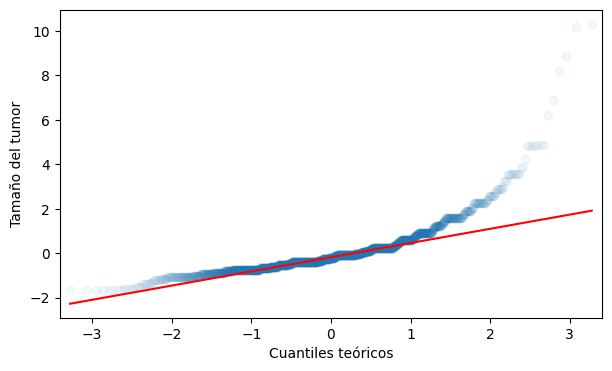

In [14]:
# Gráfico QQ
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(analisis1["tumor_size"], fit = True,  line = "q", alpha = 0.05, lw = 2, ax = ax)
plt.xlabel("Cuantiles teóricos")
plt.ylabel("Tamaño del tumor")
plt.show()

<h2> Chi cuadrado </h2>
<hr>

In [15]:
# Chi cuadrado
from scipy.stats import chi2_contingency
  
# definiendo la tabla
data = [analisis1["overall_survival"], analisis1["tumor_size"]]
stat, p, dof, expected = chi2_contingency(data)
  
# interpreta el p_valor
alpha = 0.05
print("El p-valor es: " + str(p))
if p <= alpha:
    print('Dependiente (rechaza H0)')
else:
    print('Independiente (H0 se mantiene verdadera)')


El p-valor es: 0.4362795630516269
Independiente (H0 se mantiene verdadera)


<h2> Estandarización de los datos </h2>

In [16]:
from sklearn.preprocessing import StandardScaler
datos_estandarizados = StandardScaler().fit_transform(analisis1)
datos_estandarizados = pd.DataFrame(datos_estandarizados, columns = analisis1.columns)
datos_estandarizados.describe()

,patient_id,overall_survival,neoplasm_histologic_grade,lymph_nodes_examined_positive,nottingham_prognostic_index,tumor_size,hormone_therapy,cancer_type_detailed_Breast,ctd_Breast_Invasive_Ductal_Carcinoma,ctd_Breast_Invasive_Lobular_Carcinoma,ctd_Breast_Invasive_Mixed_Mucinous_Carcinoma,ctd_Breast_Mixed_Ductal_and_Lobular_Carcinoma,ctd_Metaplastic_Breast_Cancer,cellularity_High,cellularity_Low,cellularity_Moderate,death_from_cancer_Died_of_Disease,death_from_cancer_Died_of_Other_Causes,death_from_cancer_Living
count,1.903000e+03,1.903000e+03,1.903000e+03,1.903000e+03,1.903000e+03,1.903000e+03,1.903000e+03,1.903000e+03,1.903000e+03,1.903000e+03,1.903000e+03,1.903000e+03,1.903000e+03,1.903000e+03,1.903000e+03,1.903000e+03,1.903000e+03,1.903000e+03,1.903000e+03
mean,5.974085e-17,-7.467606e-17,-2.987043e-16,-5.974085e-17,-1.045465e-16,-1.008127e-16,-1.493521e-17,-5.507360e-17,1.017461e-16,4.667254e-18,2.987043e-17,9.334508e-17,-1.120141e-17,1.344169e-16,-3.733803e-17,3.920493e-17,-3.733803e-17,2.240282e-17,-7.467606e-17
std,1.000263e+00,1.000263e+00,1.000263e+00,1.000263e+00,1.000263e+00,1.000263e+00,1.000263e+00,1.000263e+00,1.000263e+00,1.000263e+00,1.000263e+00,1.000263e+00,1.000263e+00,1.000263e+00,1.000263e+00,1.000263e+00,1.000263e+00,1.000263e+00,1.000263e+00
min,-1.664596e+00,-8.516423e-01,-2.218696e+00,-4.910008e-01,-2.653236e+00,-1.673534e+00,-1.269025e+00,-9.494096e-02,-1.929270e+00,-2.839648e-01,-1.081476e-01,-3.493593e-01,-2.292951e-02,-9.869480e-01,-3.417368e-01,-7.723189e-01,-6.968200e-01,-5.807887e-01,-8.516423e-01
25%,-1.283634e+00,-8.516423e-01,-6.517526e-01,-4.910008e-01,-8.640584e-01,-6.126031e-01,-1.269025e+00,-9.494096e-02,5.183307e-01,-2.839648e-01,-1.081476e-01,-3.493593e-01,-2.292951e-02,-9.869480e-01,-3.417368e-01,-7.723189e-01,-6.968200e-01,-5.807887e-01,-8.516423e-01
50%,3.424550e-01,-8.516423e-01,0.000000e+00,-4.910008e-01,6.919748e-03,-2.147540e-01,7.880063e-01,-9.494096e-02,5.183307e-01,-2.839648e-01,-1.081476e-01,-3.493593e-01,-2.292951e-02,-9.869480e-01,-3.417368e-01,-7.723189e-01,-6.968200e-01,-5.807887e-01,-8.516423e-01
75%,6.845997e-01,1.174202e+00,9.151906e-01,-7.728239e-04,8.800841e-01,2.494032e-01,7.880063e-01,-9.494096e-02,5.183307e-01,-2.839648e-01,-1.081476e-01,-3.493593e-01,-2.292951e-02,1.013225e+00,-3.417368e-01,1.294802e+00,1.435091e+00,1.721797e+00,1.174202e+00
max,1.431888e+00,1.174202e+00,9.151906e-01,1.053913e+01,2.033955e+00,1.032825e+01,7.880063e-01,1.053286e+01,5.183307e-01,3.521563e+00,9.246621e+00,2.862383e+00,4.361192e+01,1.013225e+00,2.926229e+00,1.294802e+00,1.435091e+00,1.721797e+00,1.174202e+00


<h1> Modelo de regresión multilineal </h1>
<hr>

In [17]:
# Modelo de regresión lineal
def modelo(base_datos):
    xi = [var_dep + "~"]
    for i in base_datos:
        xi[0] = xi[0] + "+" + i
    return xi[0]

MRL = smf.ols(modelo(analisis2), datos_estandarizados).fit()
MRL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       overall_survival   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.113e+31
Date:                Thu, 03 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:53:06   Log-Likelihood:                 62138.
No. Observations:                1903   AIC:                        -1.242e+05
Df Residuals:                    1884   BIC:                        -1.241e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                      1.913e-16   3.68e-17      5.204      0.000    1.19e-16    2.63e-16
patient_id                                     8.674e-19   3.79e-17      0.023      0.982   -7.34e-17    7.52e-17
neoplasm_histologic_grade                      5.451e-16   5.41e-17     10.081      0.000    4.39e-16    6.51e-16
lymph_nodes_examined_positive                 -9.541e-17   4.86e-17     -1.961      0.050   -1.91e-16     1.2e-21
nottingham_prognostic_index                   -1.795e-16   6.59e-17     -2.725      0.006   -3.09e-16   -5.03e-17
tumor_size                                    -9.281e-17   3.92e-17     -2.367      0.018    -1.7e-16   -1.59e-17
hormone_therapy                               -1.596e-16   3.82e-17     -4.174      0.000   -2.35e-16   -8.46e-17
cancer_type_detailed_Breast                   -1.301e-16   5.46e-17     -2.382      0.017   -2.37e-16    -2.3e-17
ctd_Breast_Invasive_Ductal_Carcinoma           3.159e-16   1.76e-16      1.792      0.073   -2.98e-17    6.62e-16
ctd_Breast_Invasive_Lobular_Carcinoma         -1.205e-16   1.18e-16     -1.019      0.309   -3.53e-16    1.12e-16
ctd_Breast_Invasive_Mixed_Mucinous_Carcinoma  -3.945e-16    5.9e-17     -6.686      0.000    -5.1e-16   -2.79e-16
ctd_Breast_Mixed_Ductal_and_Lobular_Carcinoma -3.421e-16   1.38e-16     -2.473      0.013   -6.13e-16   -7.08e-17
ctd_Metaplastic_Breast_Cancer                 -6.272e-17   3.83e-17     -1.639      0.101   -1.38e-16    1.23e-17
cellularity_High                              -2.439e-16   1.14e-16     -2.146      0.032   -4.67e-16    -2.1e-17
cellularity_Low                               -2.018e-16   7.58e-17     -2.662      0.008    -3.5e-16   -5.31e-17
cellularity_Moderate                          -7.207e-16    1.1e-16     -6.525      0.000   -9.37e-16   -5.04e-16
death_from_cancer_Died_of_Disease             -5.183e-15   7.55e-16     -6.864      0.000   -6.66e-15    -3.7e-15
death_from_cancer_Died_of_Other_Causes        -5.879e-15   6.99e-16     -8.408      0.000   -7.25e-15   -4.51e-15
death_from_cancer_Living                          1.0000   7.94e-16   1.26e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                      149.994   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              813.043
Skew:                           0.083   Prob(JB):                    2.82e-177
Kurtosis:                       6.198   Cond. No.                         56.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"

In [21]:
# Eliminando columnas cuyo P-valor supera 0.05
def limpiador_pvalor(base_datos, regresion):
    for i in base_datos:
        if regresion.pvalues[i] > 0.05:
            base_datos = base_datos.drop([i], axis = 1)
    return base_datos

y = datos_estandarizados.loc[:, var_dep]
analisis2 = datos_estandarizados.drop(var_dep, axis = 1)
analisis2 = limpiador_pvalor(analisis2, MRL)
datos_estandarizados = pd.concat([y, analisis2], axis = 1)
datos_estandarizados

,overall_survival,neoplasm_histologic_grade,nottingham_prognostic_index,tumor_size,hormone_therapy,cancer_type_detailed_Breast,ctd_Breast_Invasive_Mixed_Mucinous_Carcinoma,ctd_Breast_Mixed_Ductal_and_Lobular_Carcinoma,cellularity_High,cellularity_Low,cellularity_Moderate,death_from_cancer_Died_of_Disease,death_from_cancer_Died_of_Other_Causes,death_from_cancer_Living
0,1.174202,0.915191,1.757621,-0.281062,0.788006,-0.094941,-0.108148,-0.349359,-0.986948,-0.341737,-0.772319,-0.696820,-0.580789,1.174202
1,1.174202,0.915191,-0.012319,-1.076760,0.788006,-0.094941,-0.108148,-0.349359,1.013225,-0.341737,-0.772319,-0.696820,-0.580789,1.174202
2,-0.851642,-0.651753,-0.003574,-0.745219,0.788006,-0.094941,-0.108148,-0.349359,1.013225,-0.341737,-0.772319,1.435091,-0.580789,-0.851642
3,1.174202,-0.651753,0.013916,-0.082138,0.788006,-0.094941,-0.108148,2.862383,-0.986948,-0.341737,1.294802,-0.696820,-0.580789,1.174202
4,-0.851642,0.915191,1.789102,0.912485,0.788006,-0.094941,-0.108148,2.862383,1.013225,-0.341737,-0.772319,1.435091,-0.580789,-0.851642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1898,1.174202,0.915191,0.888392,-0.082138,0.788006,-0.094941,-0.108148,-0.349359,1.013225,-0.341737,-0.772319,-0.696820,-0.580789,1.174202
1899,-0.851642,0.915191,0.879647,-0.413679,-1.269025,-0.094941,-0.108148,-0.349359,1.013225,-0.341737,-0.772319,1.435091,-0.580789,-0.851642
1900,-0.851642,0.915191,1.762868,-0.082138,0.788006,-0.094941,-0.108148,-0.349359,1.013225,-0.341737,-0.772319,1.435091,-0.580789,-0.851642
1901,-0.851642,-0.651753,0.888392,-0.082138,0.788006,-0.094941,-0.108148,-0.349359,-0.986948,-0.341737,1.294802,-0.696820,1.721797,-0.851642


In [22]:
# Regresión con las variables contribuyentes al modelo
MRL_2 = smf.ols(modelo(analisis2), datos_estandarizados).fit()
MRL_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       overall_survival   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.171e+32
Date:                Thu, 03 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:03:58   Log-Likelihood:                 62822.
No. Observations:                1903   AIC:                        -1.256e+05
Df Residuals:                    1889   BIC:                        -1.255e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                      1.913e-16   2.56e-17      7.462      0.000    1.41e-16    2.42e-16
neoplasm_histologic_grade                       4.69e-16   3.52e-17     13.335      0.000       4e-16    5.38e-16
nottingham_prognostic_index                   -8.105e-16   3.72e-17    -21.818      0.000   -8.83e-16   -7.38e-16
tumor_size                                     1.327e-16   2.71e-17      4.895      0.000    7.95e-17    1.86e-16
hormone_therapy                                 3.52e-16   2.65e-17     13.285      0.000       3e-16    4.04e-16
cancer_type_detailed_Breast                   -9.798e-18   2.57e-17     -0.381      0.703   -6.03e-17    4.07e-17
ctd_Breast_Invasive_Mixed_Mucinous_Carcinoma  -1.242e-16   2.59e-17     -4.786      0.000   -1.75e-16   -7.33e-17
ctd_Breast_Mixed_Ductal_and_Lobular_Carcinoma  3.013e-16    2.6e-17     11.569      0.000     2.5e-16    3.52e-16
cellularity_High                               2.835e-16   7.87e-17      3.603      0.000    1.29e-16    4.38e-16
cellularity_Low                                3.056e-16   5.27e-17      5.804      0.000    2.02e-16    4.09e-16
cellularity_Moderate                           9.307e-16   7.66e-17     12.152      0.000     7.8e-16    1.08e-15
death_from_cancer_Died_of_Disease               2.55e-16   5.27e-16      0.484      0.628   -7.78e-16    1.29e-15
death_from_cancer_Died_of_Other_Causes         4.797e-16   4.88e-16      0.984      0.325   -4.77e-16    1.44e-15
death_from_cancer_Living                          1.0000   5.54e-16   1.81e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                       60.825   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.313
Skew:                          -0.434   Prob(JB):                     3.98e-15
Kurtosis:                       3.287   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h1> Prueba ANOVA </h1>
<hr>

In [23]:
# ANOVA
tabla_anova = sm.stats.anova_lm(MRL_2, typ = 3)
tabla_anova

,sum_sq,df,F,PR(>F)
Intercept,6.960757e-29,1.0,5.567861e+01,1.294729e-13
neoplasm_histologic_grade,2.223216e-28,1.0,1.778335e+02,7.745708e-39
nottingham_prognostic_index,5.951027e-28,1.0,4.760185e+02,2.662760e-94
tumor_size,2.996048e-29,1.0,2.396517e+01,1.064318e-06
hormone_therapy,2.206424e-28,1.0,1.764903e+02,1.436169e-38
cancer_type_detailed_Breast,1.813258e-31,1.0,1.450412e-01,7.033627e-01
ctd_Breast_Invasive_Mixed_Mucinous_Carcinoma,2.863546e-29,1.0,2.290530e+01,1.834010e-06
ctd_Breast_Mixed_Ductal_and_Lobular_Carcinoma,1.673369e-28,1.0,1.338516e+02,5.865719e-30
cellularity_High,1.623102e-29,1.0,1.298308e+01,3.224533e-04
cellularity_Low,4.211967e-29,1.0,3.369123e+01,7.558631e-09


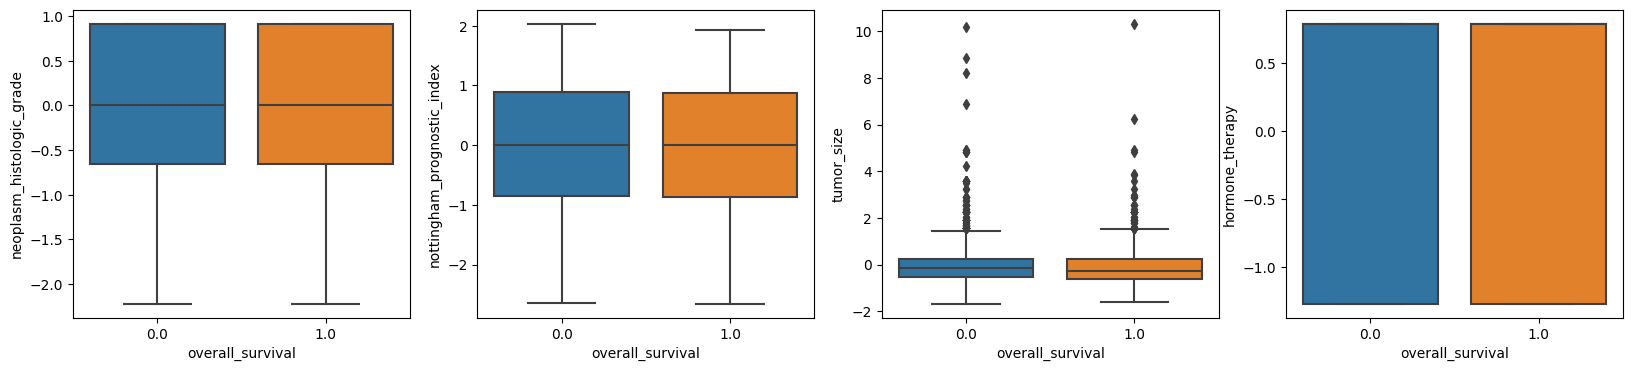

In [24]:
# variables utilizadas en el modelo de regresion 

import seaborn as sns
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
for idx, feature in enumerate(list(analisis3.columns)[:4]):

    sns.boxplot( x='overall_survival', y=feature, data=analisis3, ax=axes[idx])
plt.show()